In [1]:
#clone data from official stylegan3 Github
!git clone https://github.com/NVlabs/stylegan3.git
!pip install ninja

Cloning into 'stylegan3'...
remote: Enumerating objects: 207, done.
remote: Total 207 (delta 0), reused 0 (delta 0), pack-reused 207
Receiving objects: 100% (207/207), 4.16 MiB | 22.67 MiB/s, done.
Resolving deltas: 100% (101/101), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 145 kB 15.3 MB/s 


before execute this section put gen_utils.py in torch_utils folder


In [7]:
import sys
sys.path.insert(0, "/content/stylegan3")
import pickle
import os
import numpy as np
import PIL.Image
from IPython.display import Image
import matplotlib.pyplot as plt
import IPython.display
import torch
import dnnlib
import legacy
from torch_utils import gen_utils
import sklearn
from sklearn import preprocessing

def seed2vec(G, seed):
  return np.random.RandomState(seed).randn(1, G.z_dim)
 
def display_image(image):
  plt.axis('off')
  plt.imshow(image)
  plt.show()


def get_label(G, device, class_idx):
  label = torch.zeros([1, G.c_dim], device=device)
  if G.c_dim != 0:
      if class_idx is None:
          ctx.fail('Must specify class label with --class'\
                   'when using a conditional network')
      label[:, class_idx] = 1
  else:
      if class_idx is not None:
          print ('warn: --class=lbl ignored when running '\
            'on an unconditional network')
  return label

def generate_image(device, G, z, truncation_psi=1.0, 
                   noise_mode='const', class_idx=None):
  z = torch.from_numpy(z).to(device)
  label = get_label(G, device, class_idx)
  img = G(z, label, truncation_psi=truncation_psi, 
          noise_mode=noise_mode)
  img = (img.permute(0, 2, 3, 1) * 127.5 + 128)\
    .clamp(0, 255).to(torch.uint8)
  
  return PIL.Image.fromarray(img[0].cpu().numpy(), 'RGB')

def generate_wimage(pic_vector):
      truncation_psi:float=1.0
      noise_mode: str = 'const'
      all_w = G.mapping(torch.from_numpy(pic_vector).to(device),None)
      w_avg = G.mapping.w_avg
      all_w = w_avg + (all_w - w_avg) * truncation_psi 
      all_w[0][5] = torch.from_numpy(sklearn.preprocessing.minmax_scale(all_w[0][5].cpu().numpy() ,feature_range=(0,1.0), axis=0))
      img =gen_utils.w_to_img(G, all_w, noise_mode)
      return PIL.Image.fromarray(img[0], 'RGB')



download the pretraind data here we use,ffhq-1024x1024 data set

In [5]:

URL = "https://api.ngc.nvidia.com/v2/models/nvidia/research/"\
  "stylegan3/versions/1/files/stylegan3-r-ffhq-1024x1024.pkl"

print('Loading networks from "%s"...' % URL)
device = torch.device('cuda')
with dnnlib.util.open_url(URL) as fp:
    G = legacy.load_network_pkl(fp)['G_ema']\
      .requires_grad_(False).to(device) 

Loading networks from "https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/stylegan3-r-ffhq-1024x1024.pkl"...


Choose your random seed(preson ) it consider as seed of random explore.

In [8]:
START_SEED = 4026

current = seed2vec(G, START_SEED)

picture of current seed


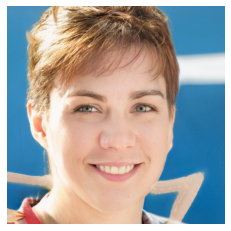

In [10]:
img = generate_image(device, G, current)
print("picture of current seed")
display_image(img)


explore size dedicate the number of random picture that want to produce

In [11]:
EXPLORE_SIZE = 500

explore = []
for i in range(EXPLORE_SIZE):
  explore.append( np.random.rand(1, 512) - 0.5 )

in this section for authorize with google Drive for saving the result

In [28]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


if want to explor in z_space set space_mode "1" and for exploring in w_space set space_mode "0"

In [39]:
space_mode=1

generating random picture make sure that target file is exist in your Google Drive(path file is valid)

In [43]:
# Choose the direction to move.  Choose -1 for the initial iteration.   
MOVE_DIRECTION = -1
if MOVE_DIRECTION >=0:
      current = current + explore[MOVE_DIRECTION]

if(space_mode):
    print("we exploring in z space")
    dict={}
    for i, mv in enumerate(explore):
      z = current + mv
      dict[i]=z
      img =(generate_image(device, G, z))
      currentImage='{0:0=3d}.jpg'.format(i)
      pathfile = F"/content/gdrive/My Drive/StyleGAN/pic/random/4026/{currentImage}"
      #print(pathfile)
      img.save(pathfile)
      #display_image(img)
else:
  print("we exploring in w space") 
  dict={}
  for i, mv in enumerate(explore):
    z = current + mv
    dict[i]=z
    img= generate_wimage(z)
    outdir = F"/content/gdrive/My Drive/StyleGAN/pic/random/4026"
    img.save(f'{outdir}/{0:0=3d}.jpg'.format(i)) 

print("pictures are saved in inserted path file successfully")    

we exploring in z space
pictures are saved in inserted path file successfully


In [20]:
import numpy as np

In [ ]:
for key in dict.keys():
  print(key)

after generating the picture you should insert  2 selected picture number here that want to get picture between them
you can check your number and picture here .
 

-------------------------------------start point from this picture-------------------------------


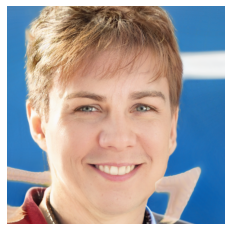

------------------------------------end point is this picture---------------------------------


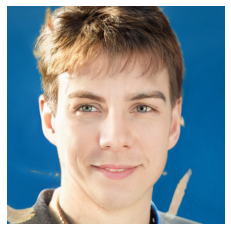

In [46]:
pic1=0
pic2=6
if (space_mode):
  print("-------------------------------------start point from this picture-------------------------------")
  img = generate_image(device, G, dict.get(pic1))
  display_image(img)
  print("------------------------------------end point is this picture---------------------------------")
  img = generate_image(device, G, dict.get(pic2))
  display_image(img)
else:
    print("-------------------------------------start point from this picture-------------------------------")
    img=generate_wimage(dict.get(pic1))
    display((img).resize([300,300]))
    print("------------------------------------end point is this picture---------------------------------")
    img2=generate_wimage(dict.get(pic2))
    display((img2).resize([300,300]))

number of the sample show number of sample produced between the 2 picture

In [47]:
sampleNumber=20

newExplore=[]

if (space_mode):
  lenght=dict.get(pic2)-dict.get(pic1)/sampleNumber
  for j in range(sampleNumber):
    newExplore.append(dict.get(pic1)+(j*lenght))
  for j,mv2 in enumerate(newExplore):
    img2 =(generate_image(device, G, mv2))
    currentImage='{0:0=2d}.jpg'.format(j)
    pathfile = F"/content/gdrive/My Drive/StyleGAN/pic/spesific/4026/{currentImage}"
    #print(pathfile)
    img2.save(pathfile)
    #display_image(img)
else:
  lenght=dict.get(pic2)-dict.get(pic1)/sampleNumber
  for j in range(sampleNumber):
    newExplore.append(dict.get(pic1)+(j*lenght))
  for j,mv2 in enumerate(newExplore):
    img=generate_wimage(dict.get(pic2))
    outdir = F"//content/gdrive/My Drive/StyleGAN/pic/spesific/4026/"
    img.save(f'{outdir}/{0:0=2d}.jpg'.format(j)) 


print(" pictures are saved in inserted path file successfully") 

 pictures are saved in inserted path file successfully
